# Rollout orbits

This notebook "rolls out" the orbits, and compares with the observed data

In [1]:
import numpy as np
from simulate_orbits import *
import read_orbits
from solar_system_names import *
from matplotlib import pyplot as plt
import math
from copy import copy

In [2]:
nplanets = 8 # Number of planets (not counting the sun)
data, masses, names = read_orbits.main(nplanets = nplanets, frame='b', use_moons = True, 
                                       path='/Users/Pablo/Dropbox/data/orbits/7parts/part1//')
nplanets = len(data[0])
nedges = nplanets*(nplanets-1)//2

Reading data in Solar System barycenter reference frame
Reading data for mercury
Reading data for venus
Reading data for earth
Reading data for moon
Reading data for mars
Reading data for jupiter
Reading data for io
Reading data for europa
Reading data for ganymede
Reading data for callisto
Reading data for saturn
Reading data for mimas
Reading data for enceladus
Reading data for tethys
Reading data for dione
Reading data for rhea
Reading data for titan
Reading data for hyperion
Reading data for iapetus
Reading data for phoebe
Reading data for uranus
Reading data for ariel
Reading data for umbriel
Reading data for titania
Reading data for oberon
Reading data for miranda
Reading data for neptune
Reading data for triton
Reading data for nereid
Reading data for proteus
Finished reading data
The data array contains 31 bodies.


In [3]:
learned_masses = np.load('./saved_models/learned_masses.npy')

bodies_sim = []
bodies_learned = []
for i in range(nplanets):
    body = Body()
    body.name = names[i]
    body.mass = masses[i]/masses[0] # Solar masses
    body.pos = copy(data[0, i, :3])
    body.vel = copy(data[0, i, 3:])#*365.25 # Convert velocity to AU/Y
    bodies_sim.append(body)
    
    body_learned = Body()
    body_learned.name = names[i]
    body_learned.mass = 10**(learned_masses[i]) # Solar masses
    body_learned.pos = copy(data[0, i, :3])
    body_learned.vel = copy(data[0, i, 3:])#*365.25 # Convert velocity to AU/Y
    bodies_learned.append(body_learned)

In [4]:
delta_time = 0.5*(1/24.)#*DAY/YEAR # 30 minutes
total_time = 0.1*365 # 0.1 years
# The G learned divided by the learned mass of the sun,
G_learned = 19422207.0337081/10**(3.3537278)*3.7630259666518835e-06*0.008888999709186746

sim_orbits = simulate(bodies_sim, total_time, delta_time, G)
sim_learned = simulate(bodies_learned, total_time, delta_time, G_learned)


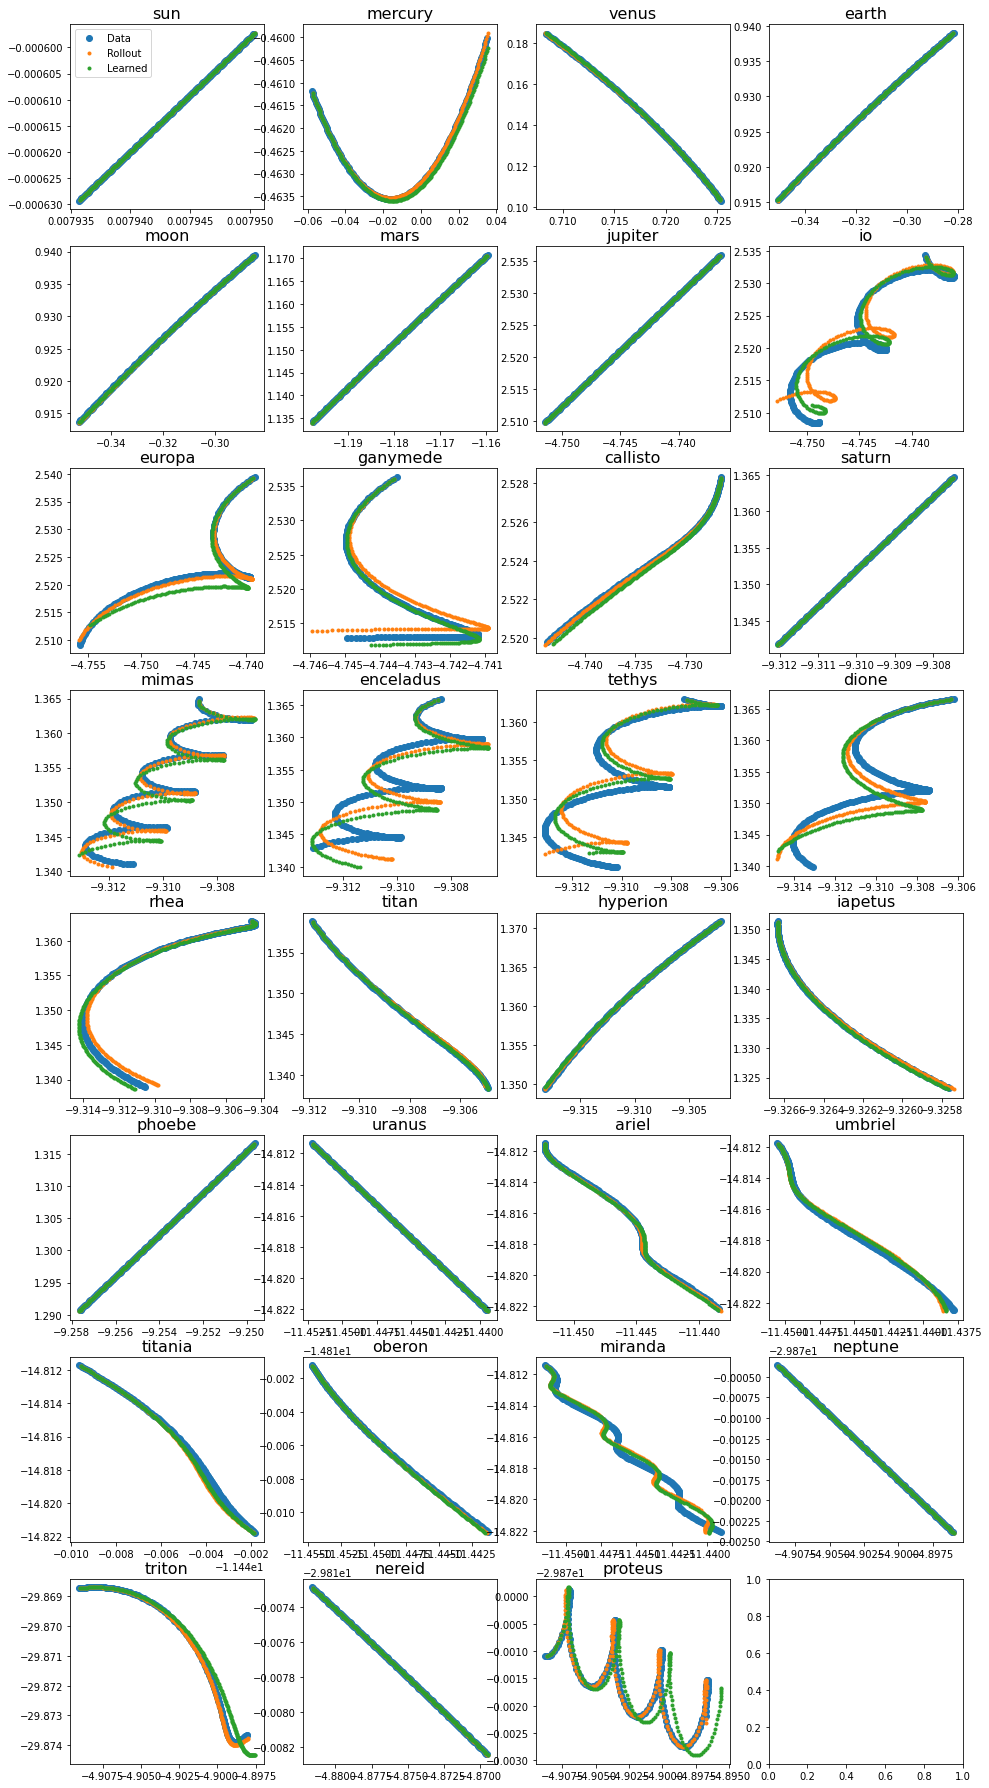

In [6]:
nrows = math.ceil(nplanets/4)
fig, ax = plt.subplots(nrows, 4, figsize = (16, 4*nrows))
for i in range(nplanets):
    ax[i//4, i%4].set_title(names[i], fontsize = 16)
    ax[i//4, i%4].plot(data[:200,i,0], data[:200,i,1], 'o', label = 'Data')
    ax[i//4, i%4].plot(sim_orbits[:200,i,0], sim_orbits[:200,i,1], '.', label = 'Rollout')
    ax[i//4, i%4].plot(sim_learned[:200,i,0], sim_learned[:200,i,1], '.', label = 'Learned')

ax[0,0].legend()
plt.savefig('/Users/Pablo/Desktop/rollout.png')

In [16]:
G

0.0002959745994938649

In [10]:
19422207.0337081/10**(3.3537278)*3.7630259666518835e-06*0.008888999709186746

0.0002877139280961437

In [2]:
nplanets = 8 # Number of planets (not counting the sun)
data, masses, names = read_orbits.main(nplanets = nplanets, frame='b', use_moons = True, 
                                       path='/Users/Pablo/Dropbox/data/orbits/7parts/full//')
nplanets = len(data[0])
nedges = nplanets*(nplanets-1)//2

Reading data in Solar System barycenter reference frame
Reading data for mercury
Reading data for venus
Reading data for earth
Reading data for moon
Reading data for mars
Reading data for jupiter
Reading data for io
Reading data for europa
Reading data for ganymede
Reading data for callisto
Reading data for saturn
Reading data for mimas
Reading data for enceladus
Reading data for tethys
Reading data for dione
Reading data for rhea
Reading data for titan
Reading data for hyperion
Reading data for iapetus
Reading data for phoebe
Reading data for uranus
Reading data for ariel
Reading data for umbriel
Reading data for titania
Reading data for oberon
Reading data for miranda
Reading data for neptune
Reading data for triton
Reading data for nereid
Reading data for proteus
Finished reading data
The data array contains 31 bodies.


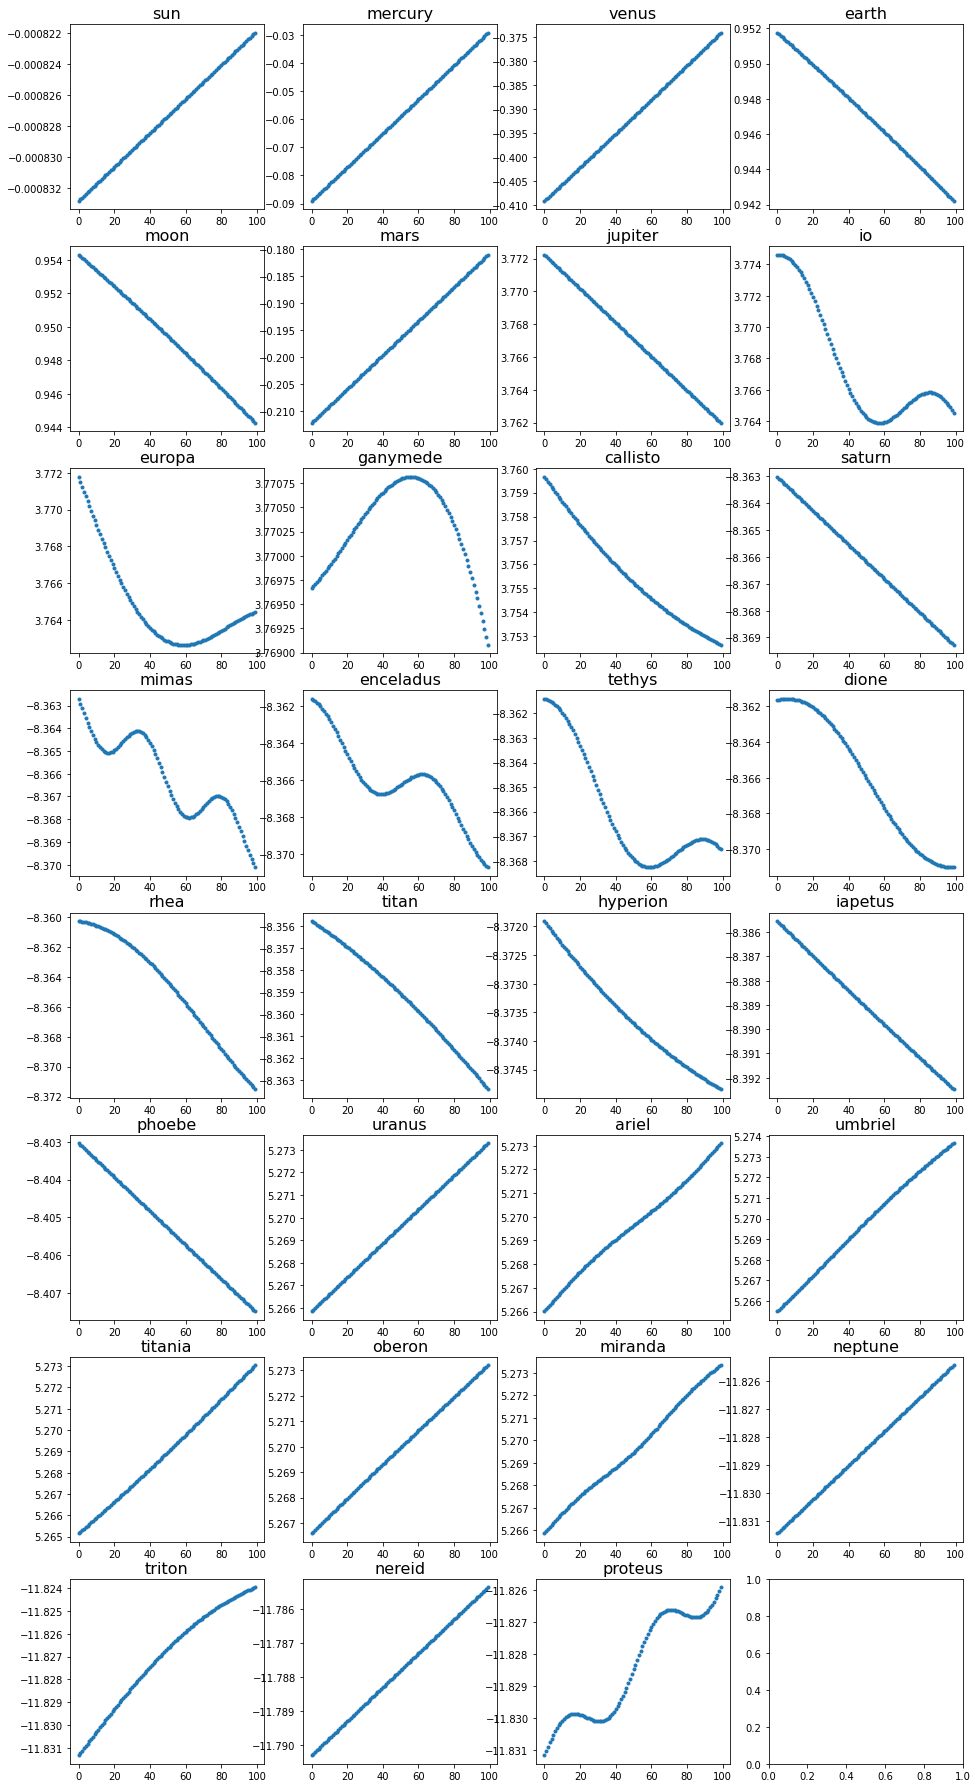

In [32]:
N=7
nrows = math.ceil(nplanets/4)
fig, ax = plt.subplots(nrows, 4, figsize = (16, 4*nrows))
for i in range(nplanets):
    ax[i//4, i%4].set_title(names[i], fontsize = 16)
    ax[i//4, i%4].plot(data[N*87650-50:N*87650+50,i,1], '.', label = 'Truth')

#plt.savefig('/Users/Pablo/Desktop/full_learnedmasses.png')

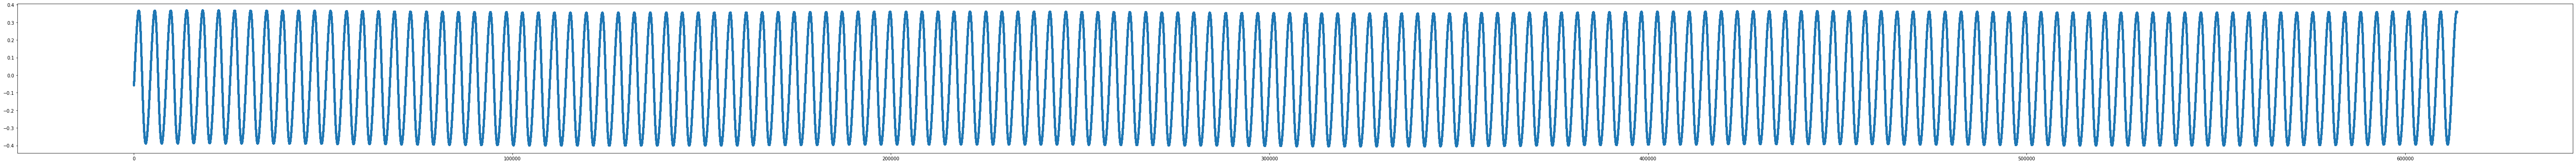

In [8]:
fig = plt.figure(figsize=(100, 6))
plt.plot(data[:,1,0], '.', label = 'Truth')

In [13]:
for i in range(len(names)):
    print(i, names[i])

0 sun
1 mercury
2 venus
3 earth
4 moon
5 mars
6 jupiter
7 io
8 europa
9 ganymede
10 callisto
11 saturn
12 mimas
13 enceladus
14 tethys
15 dione
16 rhea
17 titan
18 hyperion
19 iapetus
20 phoebe
21 uranus
22 ariel
23 umbriel
24 titania
25 oberon
26 miranda
27 neptune
28 triton
29 nereid
30 proteus


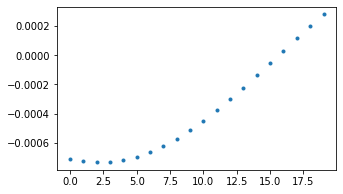

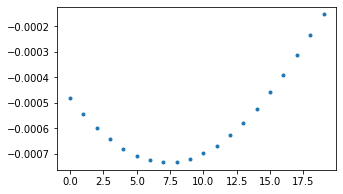

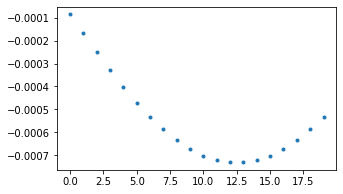

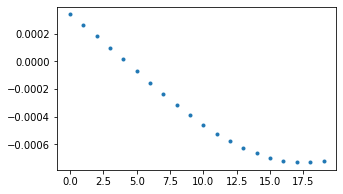

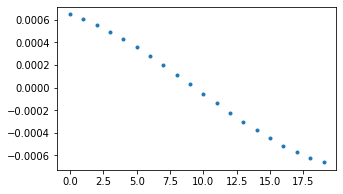

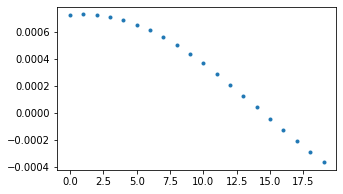

In [67]:
p = 30
for N in range(1,7):
    fig = plt.figure(figsize=(5, 3))
    plt.plot(data[N*87697-10:N*87697+10,p,0]-data[N*87697-10:N*87697+10,27,0], '.', label = 'Truth')

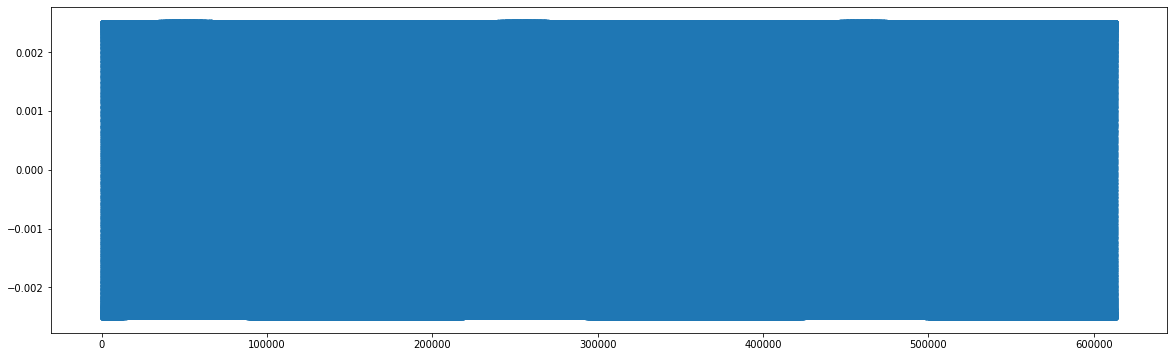

In [22]:
fig = plt.figure(figsize=(20, 6))
plt.plot(data[:,15,0]-data[:,11,0], '.', label = 'Truth')

In [30]:
N=2
N*990, N*1010

(1980, 2020)